In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [3]:
def compare(data_1,data_2, name_1, name_2):
    attributeNames = ["A","B","C","D","E","F"]
    for i in range(6):
        fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
        ax[0].hist(data_1[:,i])
        ax[0].title.set_text(attributeNames[i] + ": " +  name_1)
        ax[1].hist(data_2[:,i])
        ax[1].title.set_text(attributeNames[i] + ": " + name_2)
        plt.show()

        print(name_1, "Mean:",np.mean(data_1[:,i]))
        print(name_2, "Mean:",np.mean(data_2[:,i]))
        print(name_1, "Var:",np.var(data_1[:,i]))
        print(name_2, "Var:",np.var(data_2[:,i]))

In [4]:
def condition(data, ncol):
    attributeNames = ["A","B","C","D","E","F"]
    fig, ax = plt.subplots(nrows = 6, ncols=6, sharex=True, sharey=True, figsize = (10,10))
    info_mean = np.zeros((6,6))
    info_var = np.zeros((6,6))
    for i in range(0,5):
        data_cond = data[data[:,ncol]>(i-2)]
        for j in range(0,6):
            ax[i,j].hist(data_cond[:,j])
            ax[i,j].title.set_text(attributeNames[j] + ": Condition " + attributeNames[ncol] + ">"+ str(i-2))
            info_mean[i,j] = np.mean(data_cond[:,j])
            info_var[i,j] = np.var(data_cond[:,j])
    for j in range(0,6):
        ax[5,j].hist(data[:,j])
        ax[5,j].title.set_text(attributeNames[j] + ": Basic ")
        info_mean[5,j] = np.mean(data[:,j])
        info_var[5,j] = np.var(data[:,j])
    print(info_mean)
    print(info_var)
    plt.show()

In [5]:
def condition2(data, ncol):
    attributeNames = ["A","B","C","D","E","F"]
    fig, ax = plt.subplots(nrows = 6, ncols=6, sharex=True, sharey=True, figsize = (10,10))
    info_mean = np.zeros((6,6))
    info_var = np.zeros((6,6))
    for i in range(0,5):
        data_cond = data[data[:,ncol]<(i-2)]
        for j in range(0,6):
            ax[i,j].hist(data_cond[:,j])
            ax[i,j].title.set_text(attributeNames[j] + ": Condition " + attributeNames[ncol] + ">"+ str(i-2))
            info_mean[i,j] = np.mean(data_cond[:,j])
            info_var[i,j] = np.var(data_cond[:,j])
    for j in range(0,6):
        ax[5,j].hist(data[:,j])
        ax[5,j].title.set_text(attributeNames[j] + ": Basic ")
        info_mean[5,j] = np.mean(data[:,j])
        info_var[5,j] = np.var(data[:,j])
    print(info_mean)
    print(info_var)
    plt.show()

# Initial Data

In [6]:
data1 = pd.read_csv("data_basic1.csv")
data2 = pd.read_csv("data_basic2.csv")
data3 = pd.read_csv("data_basic3.csv")

data = data1.append(data2).append(data3)

Mean: 1.6409057914083156
Var: 3.221603293105706


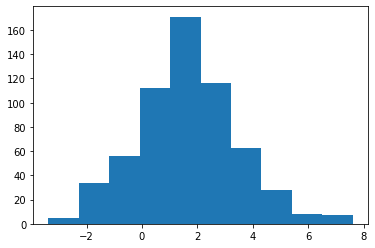

Mean: 0.21229411061003423
Var: 2.4118343132357913


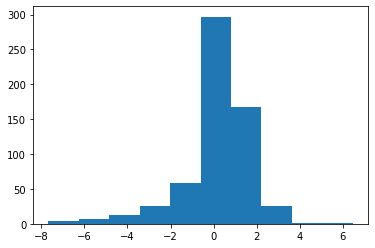

Mean: 1.051012539037852
Var: 2.5620911821691794


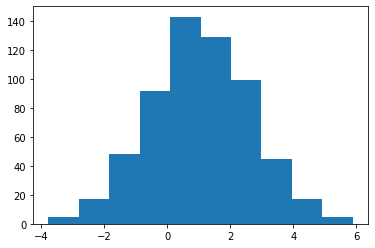

Mean: -0.5178748515200666
Var: 2.138740425921494


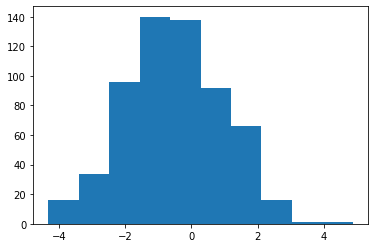

Mean: -1.0425902736282966
Var: 4.900543947594995


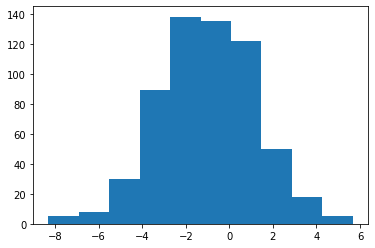

Mean: -0.2269426289645107
Var: 0.6149271811079514


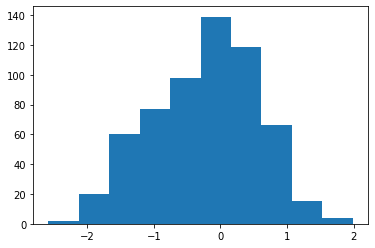

[[ 1.         -0.31895636  0.88936597 -0.02317182 -0.68730281  0.0224773 ]
 [-0.31895636  1.         -0.3841942  -0.10873039  0.32368968 -0.13719624]
 [ 0.88936597 -0.3841942   1.         -0.04196272 -0.7562831   0.01120246]
 [-0.02317182 -0.10873039 -0.04196272  1.          0.07425454  0.31856802]
 [-0.68730281  0.32368968 -0.7562831   0.07425454  1.          0.03273533]
 [ 0.0224773  -0.13719624  0.01120246  0.31856802  0.03273533  1.        ]]


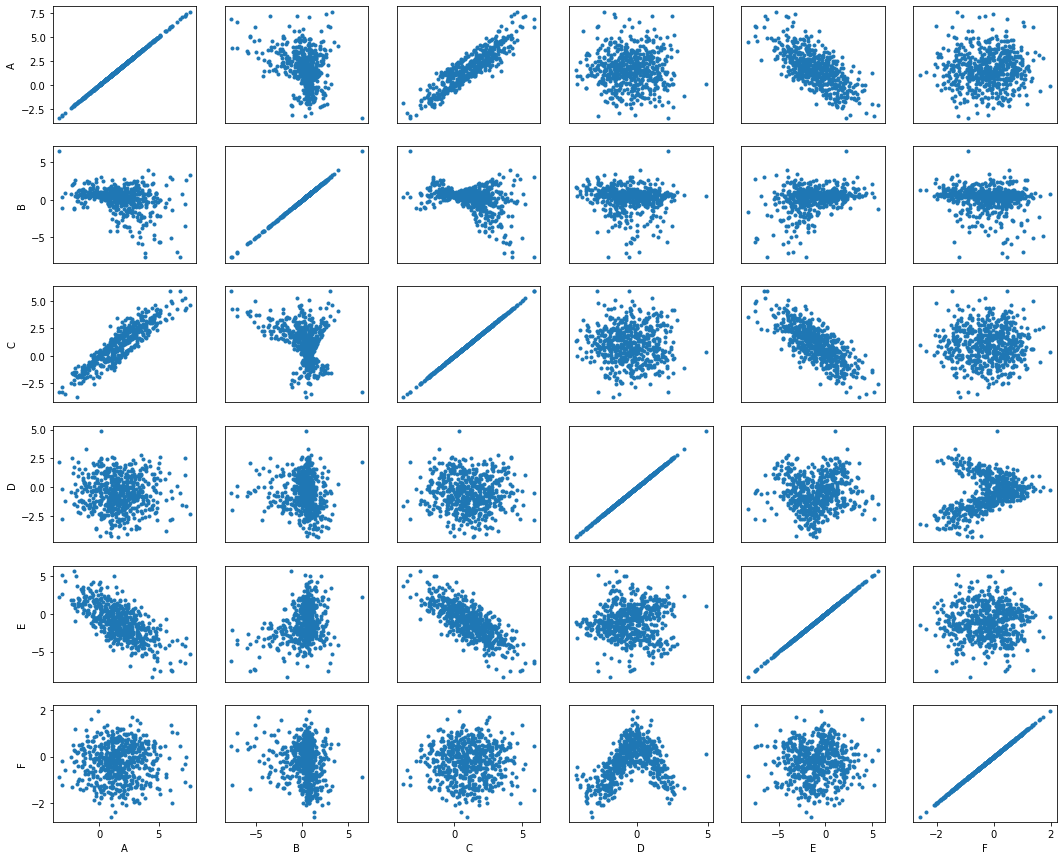

In [7]:


A = data["A"]
B = data["B"]
C = data["C"]
D = data["D"]
E = data["E"]
F = data["F"]

list = [A,B,C,D,E,F]
attributeNames = ["A","B","C","D","E","F"]

for i in list:
    print("Mean: " + str(np.mean(i)))
    print("Var: " + str(np.var(i)))
    plt.hist(i)
    plt.show()

data_matrix = data[attributeNames].to_numpy()

corr_matrix = np.corrcoef(data_matrix, rowvar=False)
print(corr_matrix)
#plt.matshow(corr_matrix)

N, M = data_matrix.shape
# Number of classes, C:
C = 6
# Correlation matrix visualized with scatter plot
fig1 = plt.figure(figsize=(18,15))
for m1 in range(M):
    for m2 in range(M):
        plt.subplot(M, M, m1*M + m2 + 1)
        plt.plot(np.array(data_matrix[:,m2]), np.array(data_matrix[:,m1]), '.')
        if m1==M-1:
            plt.xlabel(attributeNames[m2])
        else:
            plt.xticks([])
        if m2==0:
            plt.ylabel(attributeNames[m1])
        else:
            plt.yticks([])
        #ylim(0,X.max()*1.1)
        #xlim(0,X.max()*1.1)
#plt.legend(classNames, ncol = 6, loc = "lower center")
# Export
#plt.savefig('Correlation.png')
plt.show()


# Initial Data: Conditioning on A

[[ 1.71858907  0.19203698  1.1145388  -0.52710389 -1.10687141 -0.22585596]
 [ 1.90689181  0.16596052  1.27795915 -0.54446963 -1.27506924 -0.22663714]
 [ 2.15432473  0.07767404  1.47768184 -0.56642516 -1.49494588 -0.22542843]
 [ 2.60976787 -0.05723294  1.80303602 -0.56859154 -1.86134003 -0.20985891]
 [ 3.34262231 -0.29716435  2.43137853 -0.50579327 -2.50090509 -0.19831458]
 [ 1.64090579  0.21229411  1.05101254 -0.51787485 -1.04259027 -0.22694263]]
[[2.94822318 2.35060898 2.37832222 2.12295096 4.70124726 0.61657649]
 [2.48599318 2.44315613 2.02426366 2.14213534 4.39672105 0.6279962 ]
 [2.08083177 2.57381469 1.76693076 2.15402216 4.08731616 0.61993586]
 [1.68364783 3.05904307 1.64596002 2.01918155 3.77101718 0.63867556]
 [1.33815989 4.12339595 1.18744656 2.0750528  3.45037811 0.63864448]
 [3.22160329 2.41183431 2.56209118 2.13874043 4.90054395 0.61492718]]


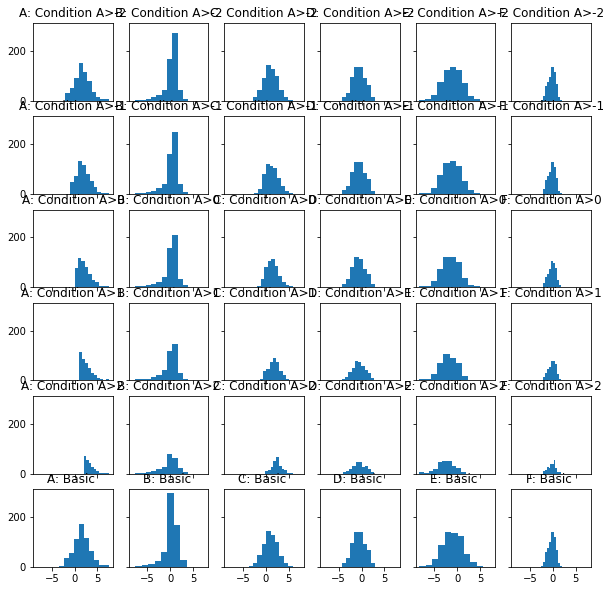

In [8]:
condition(data_matrix, 0)

# Initial Data: Conditioning on B

[[ 1.47680975  0.56780991  0.87724792 -0.53683652 -0.82842919 -0.24529515]
 [ 1.45020316  0.67479621  0.83318981 -0.52667267 -0.77915707 -0.24050516]
 [ 1.25530982  0.92911232  0.65096075 -0.5969484  -0.59420612 -0.29055146]
 [ 1.45155355  1.70749202  0.86458243 -1.04684595 -0.77432072 -0.41180357]
 [ 1.89126418  2.62158903  1.23100893 -0.99942578 -1.31020979 -0.29920235]
 [ 1.64090579  0.21229411  1.05101254 -0.51787485 -1.04259027 -0.22694263]]
[[2.9969995  0.89738948 2.35136519 2.18044795 4.54995769 0.60733214]
 [2.94957943 0.70690774 2.29361393 2.20940157 4.3998743  0.61933038]
 [2.78483088 0.49981662 2.13916368 2.34577757 4.42887025 0.66286699]
 [4.00922136 0.54504999 3.12285648 2.43050199 5.13909582 0.69338135]
 [7.28459071 0.57269617 5.84755809 2.28865309 8.06350686 0.70939121]
 [3.22160329 2.41183431 2.56209118 2.13874043 4.90054395 0.61492718]]


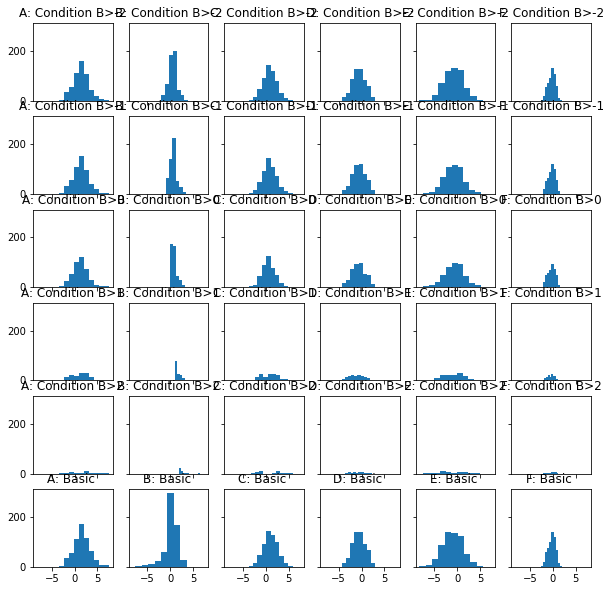

In [9]:
condition(data_matrix, 1)

# Initial Data: Conditioning on C

[[ 1.72371729  0.20612417  1.13488293 -0.51284771 -1.11854742 -0.22569582]
 [ 1.95182039  0.1315248   1.35377443 -0.54059278 -1.3577503  -0.22472677]
 [ 2.30429829 -0.02236423  1.74585788 -0.61110482 -1.75588841 -0.22622051]
 [ 2.87918774 -0.27707033  2.33108325 -0.61704046 -2.35235544 -0.20999156]
 [ 3.58552041 -0.57198049  2.98227087 -0.47547485 -3.16025154 -0.21735925]
 [ 1.64090579  0.21229411  1.05101254 -0.51787485 -1.04259027 -0.22694263]]
[[2.96096274 2.38413108 2.28814386 2.15258622 4.67253958 0.62218082]
 [2.46730779 2.43335323 1.84554916 2.14800578 4.1551434  0.63456835]
 [2.13775087 2.77670622 1.37102944 2.11005072 3.7021439  0.65406908]
 [1.81592938 3.78712256 0.91714347 2.10144512 3.22088628 0.6046816 ]
 [1.66193579 5.55109729 0.63319341 2.14285869 2.71807764 0.55445698]
 [3.22160329 2.41183431 2.56209118 2.13874043 4.90054395 0.61492718]]


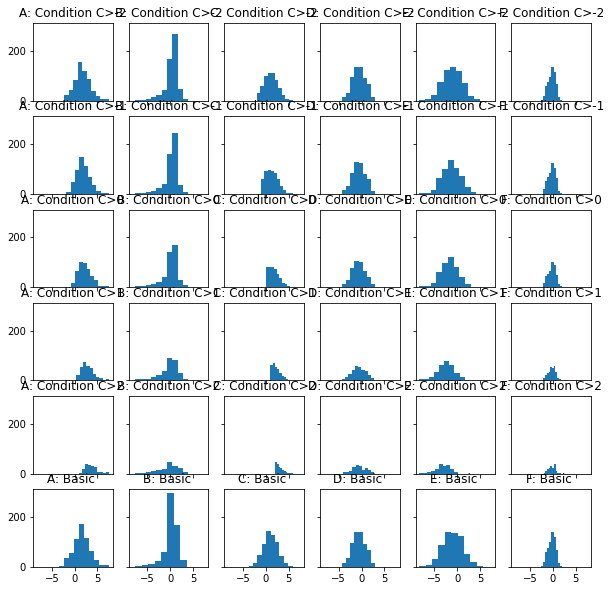

In [10]:
condition(data_matrix, 2)

# Initial Data: Conditioning D

[[ 1.61868166  0.12729446  1.02335856 -0.10992372 -0.975157   -0.04486883]
 [ 1.64371867  0.07621698  1.03295632  0.39167599 -0.96160075  0.10126373]
 [ 1.62232901  0.14067556  0.99230186  1.0682946  -0.85866316 -0.10186009]
 [ 1.61739199  0.06039222  1.04714267  1.69971568 -0.97331101 -0.54455986]
 [ 1.47288876  0.43999546  0.76622842  2.46849566 -0.74206268 -1.16362532]
 [ 1.64090579  0.21229411  1.05101254 -0.51787485 -1.04259027 -0.22694263]]
[[3.26943632 2.39790906 2.64425859 1.40738158 5.27107481 0.47013797]
 [3.22868275 2.63528506 2.60619531 0.95893304 5.36890844 0.4561856 ]
 [3.595765   2.20230084 2.65217395 0.57916451 5.53743895 0.50990015]
 [4.09935275 2.59145302 2.95693251 0.33274166 6.7538632  0.41405282]
 [6.03648523 3.83743037 3.75503879 0.32890471 7.01053188 0.25508265]
 [3.22160329 2.41183431 2.56209118 2.13874043 4.90054395 0.61492718]]


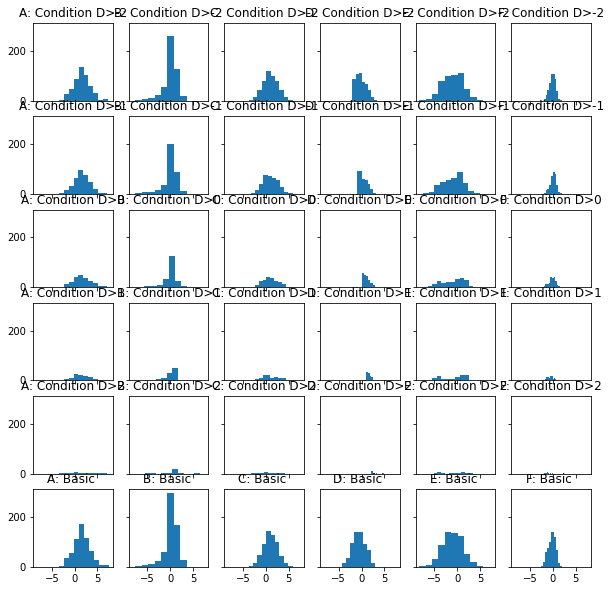

In [11]:
condition(data_matrix, 3)

[[ 0.99673891  0.48760296  0.4129539  -0.53536084  0.16032525 -0.22223232]
 [ 0.64587645  0.6225095   0.04571932 -0.20853688  0.76146264 -0.10623287]
 [ 0.310891    0.72822864 -0.31803234 -0.00511866  1.38126058 -0.14643331]
 [-0.26443511  0.81791768 -0.73268956  0.01978768  2.13005539 -0.32287936]
 [-0.67418236  0.97826408 -1.11589607 -0.27187786  3.06824594 -0.25173046]
 [ 1.64090579  0.21229411  1.05101254 -0.51787485 -1.04259027 -0.22694263]]
[[2.36615293 1.124812   1.81110637 2.15816386 2.26215064 0.61984358]
 [2.1779409  0.73890444 1.57960348 1.84270192 1.68183316 0.59506342]
 [2.07527589 0.75093076 1.41608207 1.80087712 1.28204003 0.53747951]
 [1.7882434  0.88105813 1.31594584 2.04835408 1.04864747 0.46521783]
 [1.48261506 1.41483203 1.33484593 1.88922366 0.8648651  0.36153697]
 [3.22160329 2.41183431 2.56209118 2.13874043 4.90054395 0.61492718]]


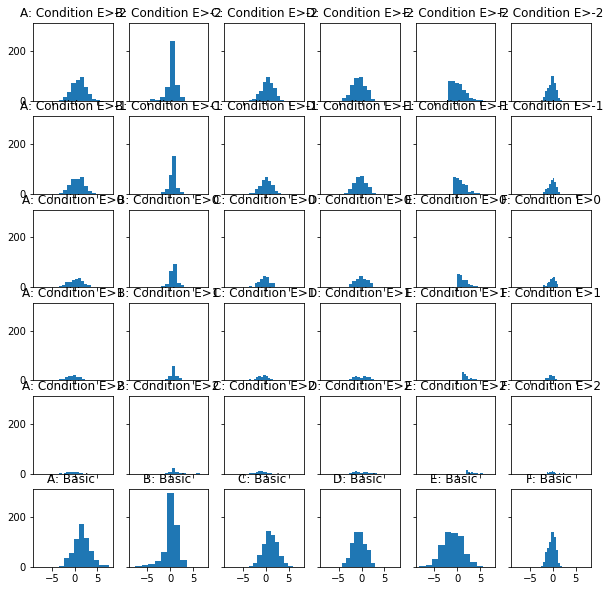

In [12]:
# Condition on E
condition(data_matrix, 4)

c:\Users\erikb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\erikb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\erikb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\erikb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\erikb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  r

[[ 1.63202713  0.20082695  1.04382301 -0.49337751 -1.02918877 -0.20709076]
 [ 1.62732244  0.14042342  1.04006095 -0.35157064 -0.97686282  0.03808977]
 [ 1.70351101  0.00780841  1.06919868 -0.07848998 -1.00948042  0.51789518]
 [ 1.77844686 -0.51919554  1.2270105  -0.05981471 -1.03148617  1.25593257]
 [        nan         nan         nan         nan         nan         nan]
 [ 1.64090579  0.21229411  1.05101254 -0.51787485 -1.04259027 -0.22694263]]
[[3.21352607 2.41427728 2.55724561 2.09860512 4.8658606  0.58126221]
 [3.11451888 2.41871964 2.54965021 1.49563811 4.84762659 0.33913109]
 [2.98271387 2.96031445 2.434225   0.65657353 4.86389219 0.13369815]
 [4.39234819 5.56963402 2.38658685 0.24137594 4.90247372 0.05904212]
 [       nan        nan        nan        nan        nan        nan]
 [3.22160329 2.41183431 2.56209118 2.13874043 4.90054395 0.61492718]]


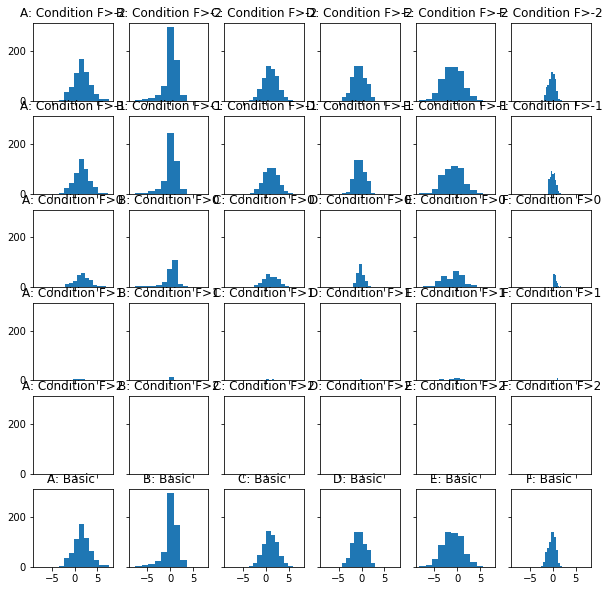

In [13]:
# Condition on E
condition(data_matrix, 5)

# Intervene E = 2

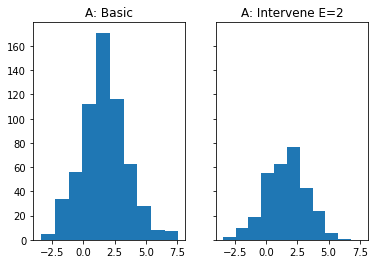

Basic Mean: 1.6409057914083156
Intervene E=2 Mean: 1.6037427000994515
Basic Var: 3.221603293105706
Intervene E=2 Var: 2.6490705524239457


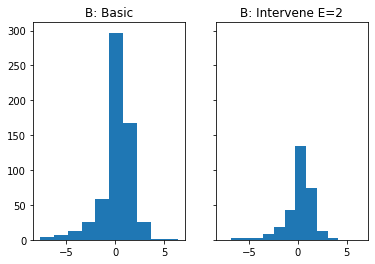

Basic Mean: 0.21229411061003423
Intervene E=2 Mean: 0.19809872939865372
Basic Var: 2.4118343132357913
Intervene E=2 Var: 2.022618957759301


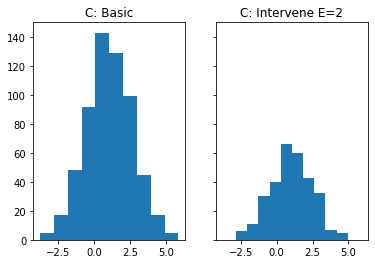

Basic Mean: 1.051012539037852
Intervene E=2 Mean: 1.031249608482497
Basic Var: 2.5620911821691794
Intervene E=2 Var: 2.1206060858294444


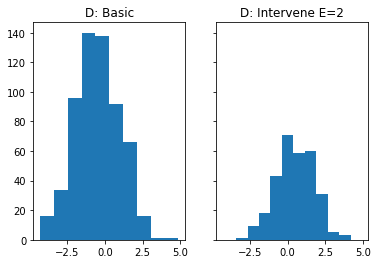

Basic Mean: -0.5178748515200666
Intervene E=2 Mean: 0.5025338738874793
Basic Var: 2.138740425921494
Intervene E=2 Var: 1.5492957371772096


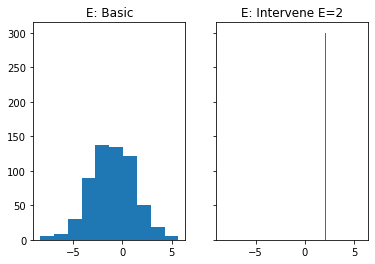

Basic Mean: -1.0425902736282966
Intervene E=2 Mean: 2.0
Basic Var: 4.900543947594995
Intervene E=2 Var: 0.0


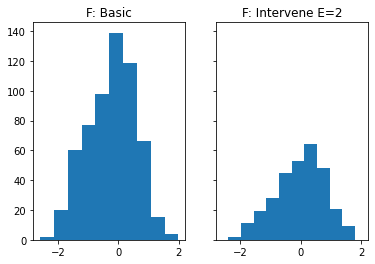

Basic Mean: -0.2269426289645107
Intervene E=2 Mean: -0.03587112027049303
Basic Var: 0.6149271811079514
Intervene E=2 Var: 0.6385383988447686


In [14]:
data_intervene_E2 = pd.read_csv("data_E2.csv")
data_intervene_E2_matrix = data_intervene_E2[attributeNames].to_numpy()
compare(data_matrix, data_intervene_E2_matrix, "Basic","Intervene E=2")

# Intervene A=2: Conditioning B

[[ 1.60880507  0.18322932  1.0426357   0.58401296  2.          0.00400536]
 [ 1.61010113  0.13569201  1.01746391  0.7707119   2.          0.02770158]
 [ 1.64765539  0.05148094  1.05588779  1.20671173  2.         -0.10443003]
 [ 1.71990498  0.0572969   1.07800312  1.79134545  2.         -0.55302629]
 [ 1.33157103  0.31396911  0.90920388  2.55501577  2.         -1.21317553]
 [ 1.6037427   0.19809873  1.03124961  0.50253387  2.         -0.03587112]]
[[2.66835205 2.06138426 2.1213612  1.33727972 0.         0.59305404]
 [2.74323724 2.02078191 2.15056376 1.04809477 0.         0.61232327]
 [2.75491534 2.11097004 2.19174779 0.68680698 0.         0.66076412]
 [2.81640831 2.03066584 2.09848337 0.39224961 0.         0.47164519]
 [2.0235226  1.08282475 1.71190029 0.26368289 0.         0.30627618]
 [2.64907055 2.02261896 2.12060609 1.54929574 0.         0.6385384 ]]


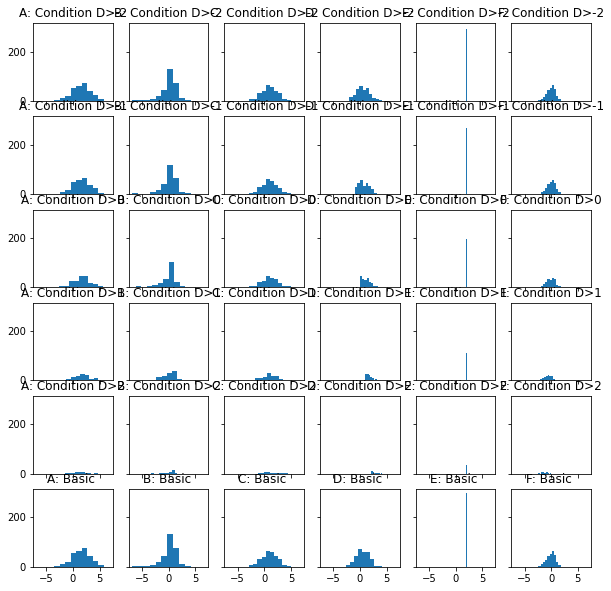

In [29]:
condition(data_intervene_E2_matrix, 3)

# Intervene A=2: Conditioning C

[[ 1.48917642  0.46985041  0.91366821  0.49174684  2.         -0.05542684]
 [ 1.40266853  0.6390031   0.83223866  0.45145805  2.         -0.05057913]
 [ 1.27943973  0.88063909  0.74081346  0.39468633  2.         -0.04522497]
 [ 1.01704042  1.74437322  0.60108909  0.14377266  2.          0.04206388]
 [ 0.60991519  2.65534721  0.34303073 -0.11100563  2.          0.12046973]
 [ 1.6037427   0.19809873  1.03124961  0.50253387  2.         -0.03587112]]
[[2.55033252 0.9127334  2.02051199 1.60221177 0.         0.66214907]
 [2.58750092 0.63905015 2.07802771 1.61970425 0.         0.66898409]
 [2.52017086 0.43346647 2.16374182 1.71959384 0.         0.67747937]
 [3.69982416 0.39260131 2.84939903 1.55177089 0.         0.62729253]
 [6.72123796 0.34456554 5.61685125 1.05903996 0.         0.35280097]
 [2.64907055 2.02261896 2.12060609 1.54929574 0.         0.6385384 ]]


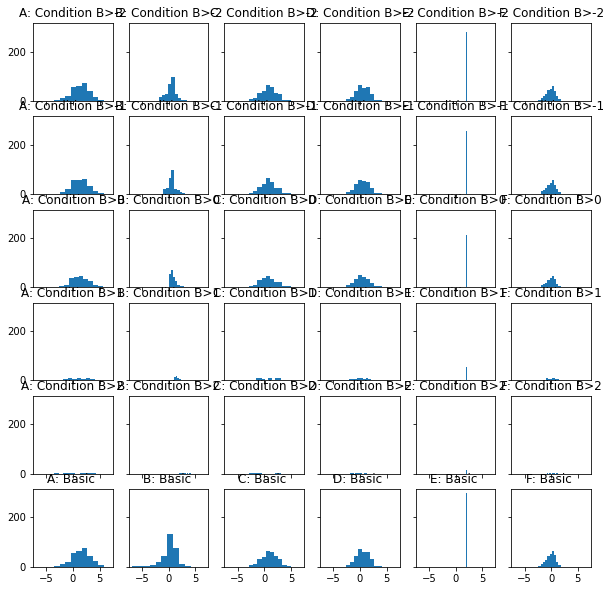

In [16]:
condition(data_intervene_E2_matrix, 1)

# Intervene A=2: Conditioning D

# Intervene B=2

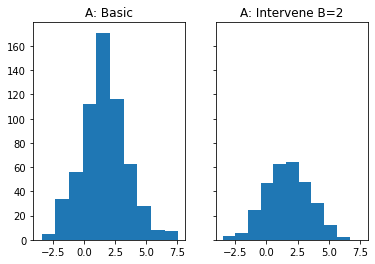

Basic Mean: 1.6409057914083156
Intervene B=2 Mean: 1.6693935290588546
Basic Var: 3.221603293105706
Intervene B=2 Var: 3.129142114131823


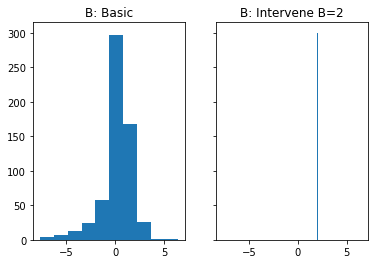

Basic Mean: 0.21229411061003423
Intervene B=2 Mean: 2.0
Basic Var: 2.4118343132357913
Intervene B=2 Var: 0.0


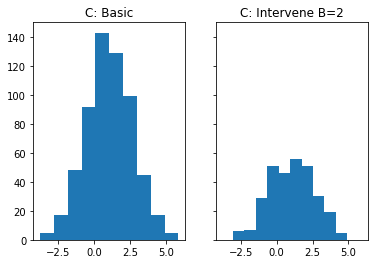

Basic Mean: 1.051012539037852
Intervene B=2 Mean: 1.0414646013456077
Basic Var: 2.5620911821691794
Intervene B=2 Var: 2.3644576299117626


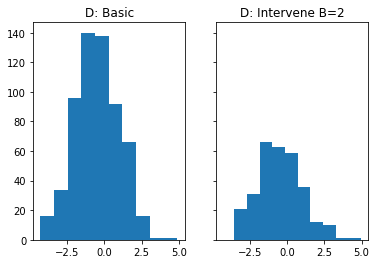

Basic Mean: -0.5178748515200666
Intervene B=2 Mean: -0.4692965194161488
Basic Var: 2.138740425921494
Intervene B=2 Var: 2.1714759664184773


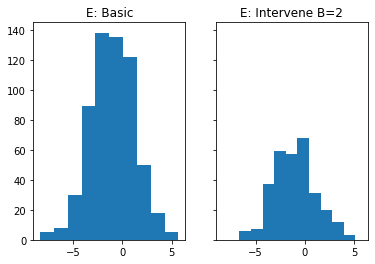

Basic Mean: -1.0425902736282966
Intervene B=2 Mean: -1.0620710280976324
Basic Var: 4.900543947594995
Intervene B=2 Var: 4.387043751374166


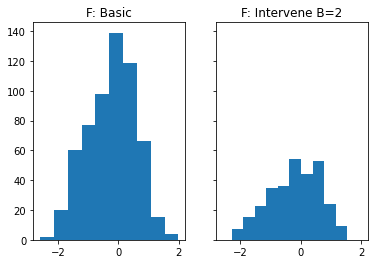

Basic Mean: -0.2269426289645107
Intervene B=2 Mean: -0.2121677026777526
Basic Var: 0.6149271811079514
Intervene B=2 Var: 0.7020643896007668


In [30]:
data_intervene_B2 = pd.read_csv("Data_B2.csv")
data_intervene_B2_matrix = data_intervene_B2[attributeNames].to_numpy()
compare(data_matrix, data_intervene_B2_matrix, "Basic","Intervene B=2")

# Intervene B=2: Conditioning A

# Intervene B=2: Conditioning C

# Intervene B=2: Conditioning D

# Intervene C = -2

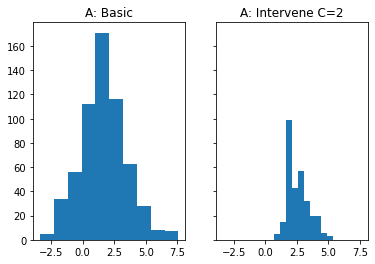

Basic Mean: 1.6409057914083156
Intervene C=2 Mean: 2.626482909322339
Basic Var: 3.221603293105706
Intervene C=2 Var: 0.7273614118122835


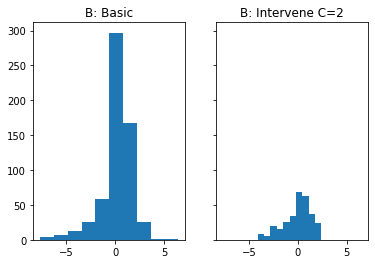

Basic Mean: 0.21229411061003423
Intervene C=2 Mean: -0.0529530397407486
Basic Var: 2.4118343132357913
Intervene C=2 Var: 2.038470823129492


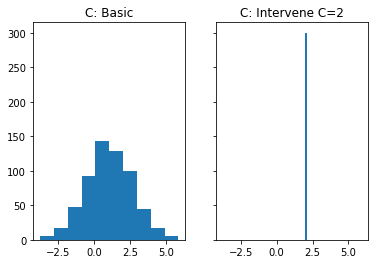

Basic Mean: 1.051012539037852
Intervene C=2 Mean: 2.0
Basic Var: 2.5620911821691794
Intervene C=2 Var: 0.0


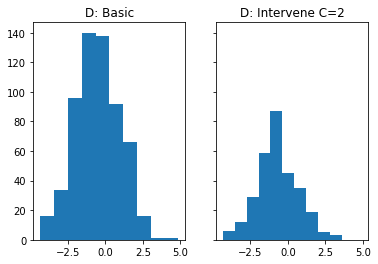

Basic Mean: -0.5178748515200666
Intervene C=2 Mean: -0.6825154041556029
Basic Var: 2.138740425921494
Intervene C=2 Var: 1.830077920558305


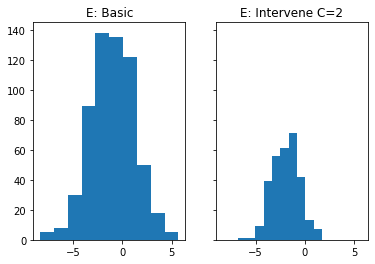

Basic Mean: -1.0425902736282966
Intervene C=2 Mean: -1.9346441743111151
Basic Var: 4.900543947594995
Intervene C=2 Var: 1.844873682374927


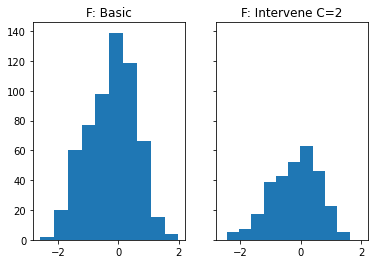

Basic Mean: -0.2269426289645107
Intervene C=2 Mean: -0.19611333627154848
Basic Var: 0.6149271811079514
Intervene C=2 Var: 0.6113665752325143


In [31]:
data_intervene_C2 = pd.read_csv("data_C2.csv")
data_intervene_C2_matrix = data_intervene_C2[attributeNames].to_numpy()
compare(data_matrix, data_intervene_C2_matrix, "Basic","Intervene C=2")

# Intervene C=-2: Conditioning A

[[-0.29938318  0.18648846 -2.          0.16118718]
 [ 0.25265087  0.2274436  -2.          0.63924235]
 [ 1.59155484  0.13262877 -2.          2.25059273]
 [ 2.26893259  0.23675255 -2.          3.09884671]
 [ 2.75950227  0.14323462 -2.          3.61626765]
 [-0.73548738  0.18474936 -2.         -0.24023674]]
[[1.88534712 0.38632983 0.         3.01536355]
 [1.84884426 0.41432355 0.         3.49338901]
 [1.18605994 0.45680737 0.         2.53159285]
 [0.62066486 0.46747269 0.         1.72040349]
 [0.38780827 0.26975797 0.         1.51689263]
 [2.87049377 0.39847433 0.         3.83277868]]


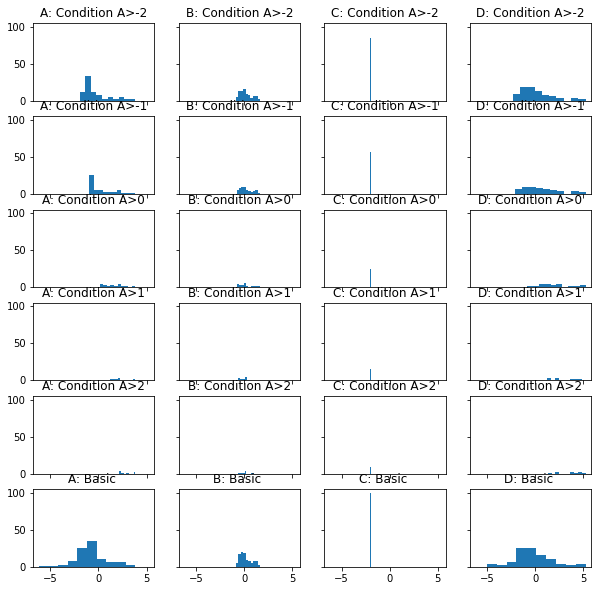

In [ ]:
condition(data_intervene_C2_matrix, 0)

# Intervene C=-2: Conditioning B

[[-0.73548738  0.18474936 -2.         -0.24023674]
 [-0.73548738  0.18474936 -2.         -0.24023674]
 [-0.60524728  0.66352302 -2.         -0.53800108]
 [-0.49399156  1.30715988 -2.         -1.06781811]
 [        nan         nan         nan         nan]
 [-0.73548738  0.18474936 -2.         -0.24023674]]
[[2.87049377 0.39847433 0.         3.83277868]
 [2.87049377 0.39847433 0.         3.83277868]
 [3.49606356 0.24747312 0.         4.48766016]
 [3.12485051 0.03581202 0.         5.2123126 ]
 [       nan        nan        nan        nan]
 [2.87049377 0.39847433 0.         3.83277868]]


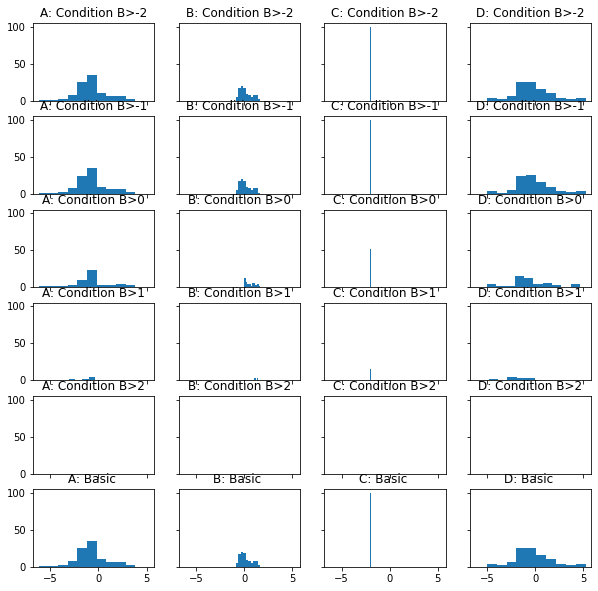

In [ ]:
condition(data_intervene_C2_matrix, 1)

# Intervene C=-2: Conditioning D

[[-4.59526039e-01  1.20098598e-01 -2.00000000e+00  1.39476487e-01]
 [-9.75337995e-02  5.86029081e-02 -2.00000000e+00  7.07499656e-01]
 [ 5.13584065e-01  1.86466896e-03 -2.00000000e+00  1.63992452e+00]
 [ 1.48797187e+00  1.12241616e-01 -2.00000000e+00  2.60300298e+00]
 [ 2.30632294e+00 -7.58328803e-02 -2.00000000e+00  3.54882249e+00]
 [-7.35487379e-01  1.84749360e-01 -2.00000000e+00 -2.40236739e-01]]
[[2.22067513 0.348938   0.         2.85794461]
 [2.22931264 0.3237081  0.         2.58314656]
 [2.65263977 0.29353533 0.         2.20870964]
 [1.8602786  0.40225507 0.         1.73142564]
 [0.92406841 0.22494005 0.         1.15248766]
 [2.87049377 0.39847433 0.         3.83277868]]


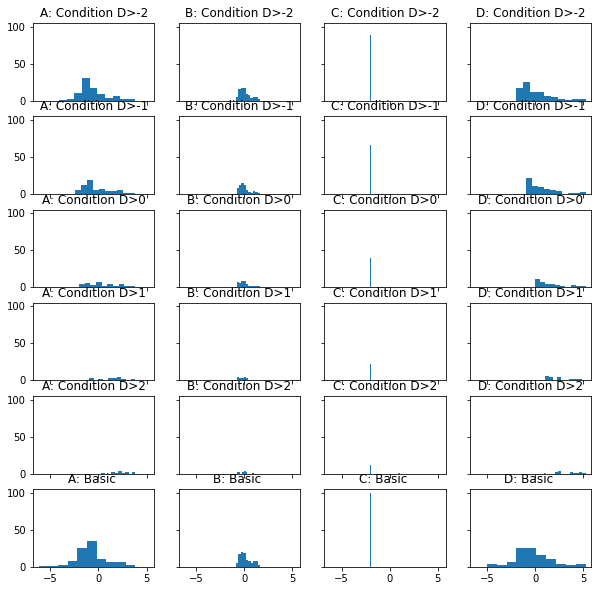

In [ ]:
condition(data_intervene_C2_matrix, 3)

# Intervene D=-2

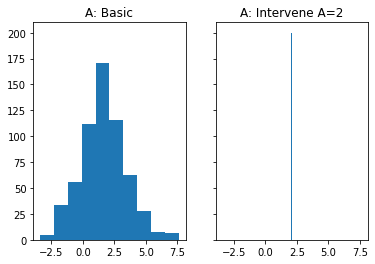

Basic Mean: 1.6409057914083156
Intervene A=2 Mean: 2.0
Basic Var: 3.221603293105706
Intervene A=2 Var: 0.0


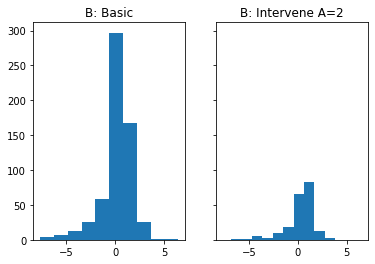

Basic Mean: 0.21229411061003423
Intervene A=2 Mean: 0.24424233214559388
Basic Var: 2.4118343132357913
Intervene A=2 Var: 2.0148195234418442


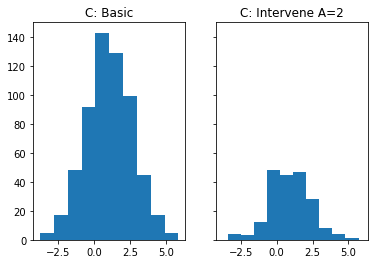

Basic Mean: 1.051012539037852
Intervene A=2 Mean: 0.9135161174202695
Basic Var: 2.5620911821691794
Intervene A=2 Var: 2.0596742474110683


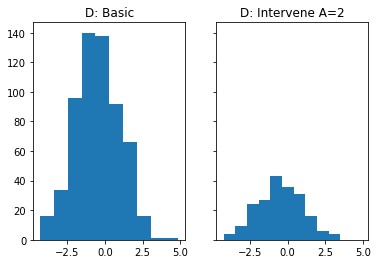

Basic Mean: -0.5178748515200666
Intervene A=2 Mean: -0.5185742949285578
Basic Var: 2.138740425921494
Intervene A=2 Var: 2.1700385991476905


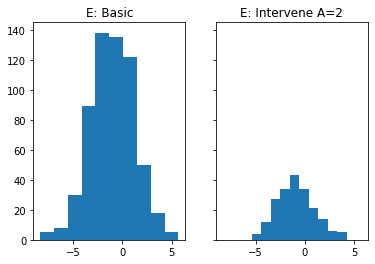

Basic Mean: -1.0425902736282966
Intervene A=2 Mean: -0.9406363460145863
Basic Var: 4.900543947594995
Intervene A=2 Var: 3.580351807891765


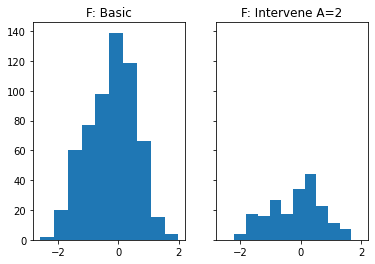

Basic Mean: -0.2269426289645107
Intervene A=2 Mean: -0.18035389679233574
Basic Var: 0.6149271811079514
Intervene A=2 Var: 0.7075055117548472


In [32]:
data_intervene_D2 = pd.read_csv("data_A2.csv")
data_intervene_D2_matrix = data_intervene_D2[attributeNames].to_numpy()
compare(data_matrix, data_intervene_D2_matrix, "Basic","Intervene A=2")

# Intevene D=-2: Conditioning A

[[ 1.45959295  0.19124796  0.17949803 -2.        ]
 [ 1.52290124  0.18098552  0.20941773 -2.        ]
 [ 1.89489033  0.16246261  0.35109494 -2.        ]
 [ 2.33851004  0.1374029   0.59768929 -2.        ]
 [ 3.09636996  0.08995948  0.91540736 -2.        ]
 [ 1.13187242  0.17973023  0.10712624 -2.        ]]
[[2.13556155 0.39360674 1.02262967 0.        ]
 [1.99310873 0.37538438 0.96881843 0.        ]
 [1.51198911 0.36097472 0.85150418 0.        ]
 [1.11031041 0.34624537 0.73922454 0.        ]
 [0.92047612 0.3607637  0.69509832 0.        ]
 [3.86308376 0.40920039 1.06777793 0.        ]]


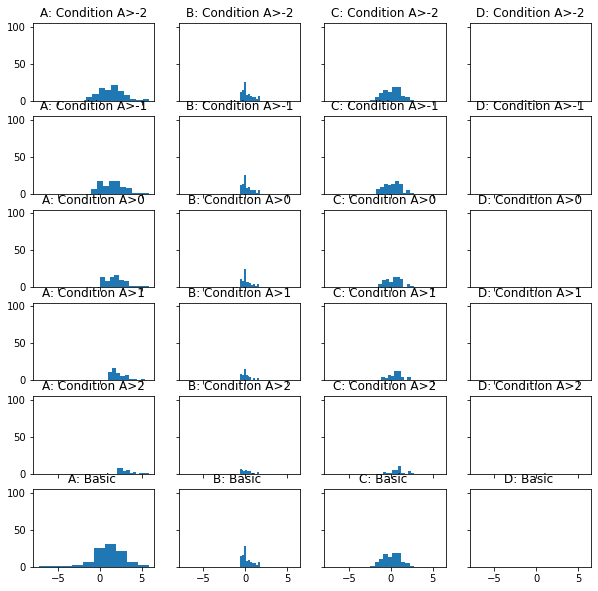

In [ ]:
condition(data_intervene_D2_matrix, 0)

# Intevene D=-2: Conditioning B

[[ 1.13187242  0.17973023  0.10712624 -2.        ]
 [ 1.13187242  0.17973023  0.10712624 -2.        ]
 [ 1.25679147  0.69724873  0.13061868 -2.        ]
 [ 0.60246943  1.3917525   0.07431373 -2.        ]
 [        nan         nan         nan         nan]
 [ 1.13187242  0.17973023  0.10712624 -2.        ]]
[[3.86308376 0.40920039 1.06777793 0.        ]
 [3.86308376 0.40920039 1.06777793 0.        ]
 [3.46990301 0.29780754 1.05031471 0.        ]
 [4.19925061 0.05748493 1.05881704 0.        ]
 [       nan        nan        nan        nan]
 [3.86308376 0.40920039 1.06777793 0.        ]]


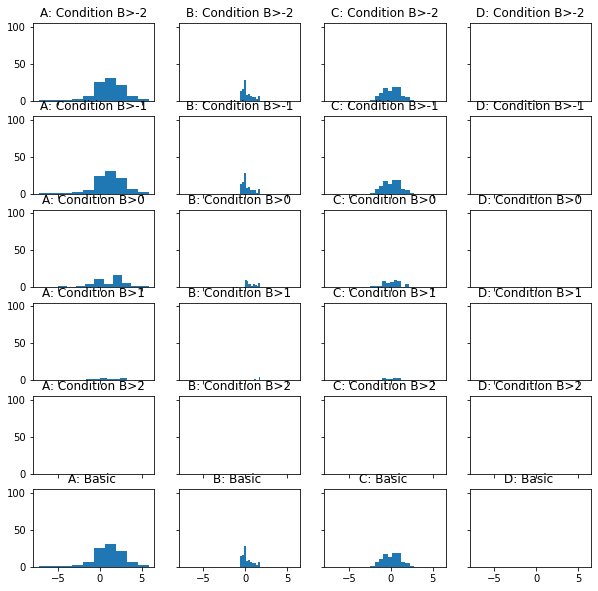

In [ ]:
condition(data_intervene_D2_matrix, 1)

# Intervene D=-2: Conditioning C

[[ 1.1595175   0.16472359  0.13292375 -2.        ]
 [ 1.38843546  0.20079028  0.35241504 -2.        ]
 [ 1.97143777  0.22032004  0.91560249 -2.        ]
 [ 2.345859   -0.03385492  1.53939443 -2.        ]
 [ 2.82318481  0.2486035   2.25332225 -2.        ]
 [ 1.13187242  0.17973023  0.10712624 -2.        ]]
[[3.82567973 0.39081381 1.01201239 0.        ]
 [3.67174771 0.41900931 0.74560127 0.        ]
 [1.50083139 0.43288325 0.35104929 0.        ]
 [0.87448685 0.22274928 0.25909175 0.        ]
 [0.24517329 0.27615858 0.05649734 0.        ]
 [3.86308376 0.40920039 1.06777793 0.        ]]


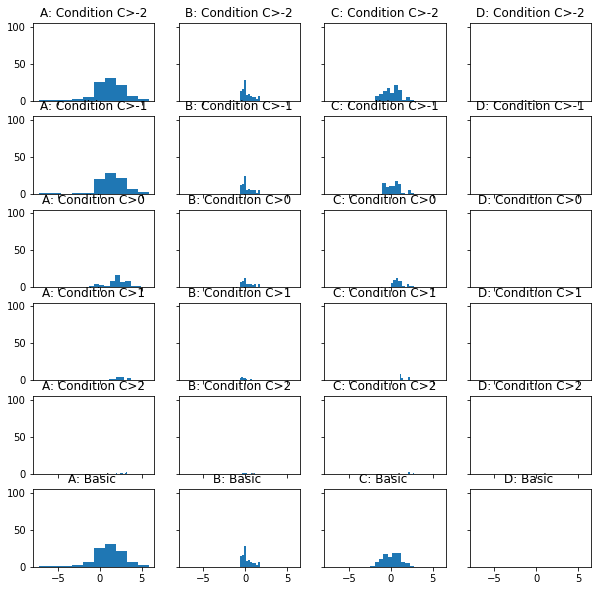

In [ ]:
condition(data_intervene_D2_matrix, 2)

Intervention: B = -2


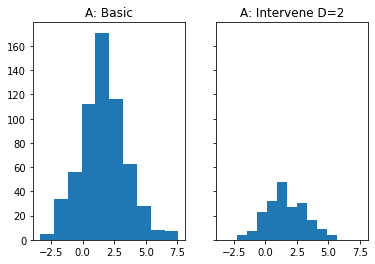

Basic Mean: 1.6409057914083156
Intervene D=2 Mean: 1.62106249010775
Basic Var: 3.221603293105706
Intervene D=2 Var: 2.388539457431967


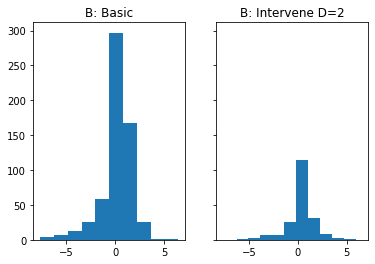

Basic Mean: 0.21229411061003423
Intervene D=2 Mean: 0.37080574300191843
Basic Var: 2.4118343132357913
Intervene D=2 Var: 2.14997136829155


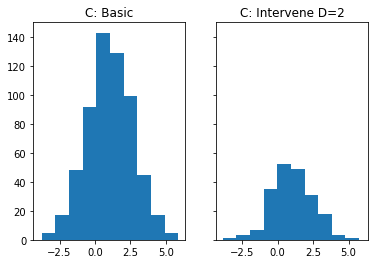

Basic Mean: 1.051012539037852
Intervene D=2 Mean: 1.0187114213975277
Basic Var: 2.5620911821691794
Intervene D=2 Var: 1.9781863784776375


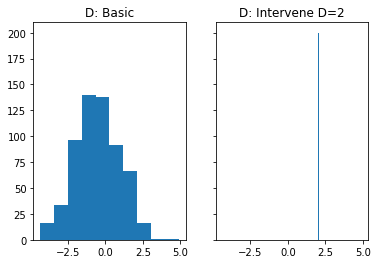

Basic Mean: -0.5178748515200666
Intervene D=2 Mean: 2.0
Basic Var: 2.138740425921494
Intervene D=2 Var: 0.0


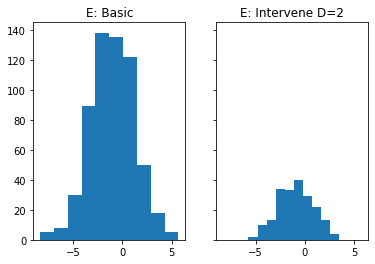

Basic Mean: -1.0425902736282966
Intervene D=2 Mean: -0.9544400872348854
Basic Var: 4.900543947594995
Intervene D=2 Var: 3.198516457283191


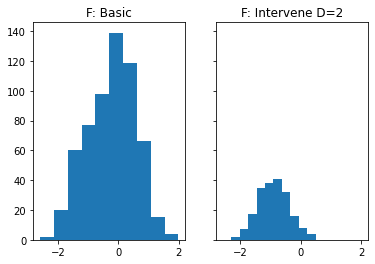

Basic Mean: -0.2269426289645107
Intervene D=2 Mean: -0.8894537705048225
Basic Var: 0.6149271811079514
Intervene D=2 Var: 0.2612420033060803


In [ ]:
data_intervene_Bminus2 = pd.read_csv("data_D2.csv")
data_intervene_Bminus2_matrix = data_intervene_Bminus2[attributeNames].to_numpy()
compare(data_matrix, data_intervene_Bminus2_matrix, "Basic","Intervene D=2")

[[ 1.44429838 -2.          0.1694197   4.09806182]
 [ 1.63520721 -2.          0.24678309  4.29805125]
 [ 2.03550688 -2.          0.40230635  4.70580661]
 [ 2.54100671 -2.          0.644564    5.20401037]
 [ 3.25882322 -2.          0.90674675  5.92753488]
 [ 1.12827368 -2.          0.10870097  3.78827368]]
[[3.04249839 0.         1.18357027 3.53879552]
 [2.65353592 0.         1.10739399 3.09788565]
 [2.12450915 0.         0.97563526 2.51806278]
 [1.82782773 0.         0.89695326 2.20483204]
 [1.72846421 0.         1.0119737  2.04745439]
 [4.23952064 0.         1.24159853 4.69160827]]


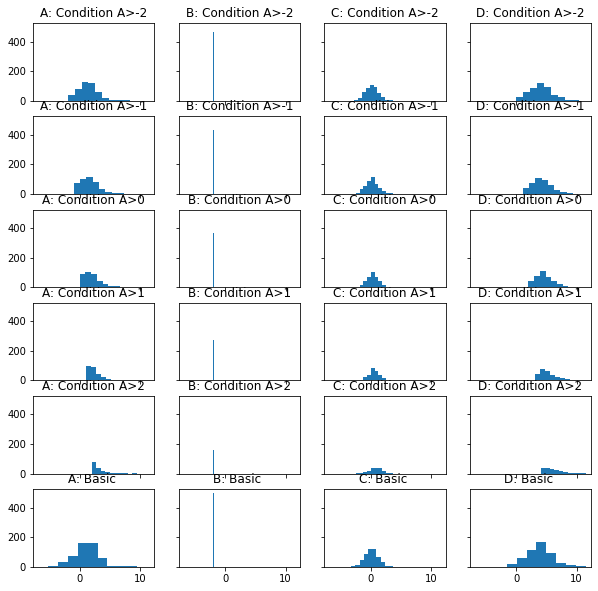

In [ ]:
condition(data_intervene_Bminus2_matrix, 0)

[[ 1.20474677 -2.          0.18625062  3.86454059]
 [ 1.43424461 -2.          0.42161932  4.10170304]
 [ 1.94667178 -2.          0.90982403  4.59995645]
 [ 2.54500131 -2.          1.67571841  5.15284444]
 [ 3.39954522 -2.          2.53293042  6.39954522]
 [ 1.12827368 -2.          0.10870097  3.78827368]]
[[4.1186568  0.         1.07471037 4.56601775]
 [3.83988863 0.         0.80928267 4.21096462]
 [3.30888721 0.         0.52117254 3.78522044]
 [3.29830265 0.         0.33723071 3.72968474]
 [3.24262508 0.         0.28650245 3.16486387]
 [4.23952064 0.         1.24159853 4.69160827]]


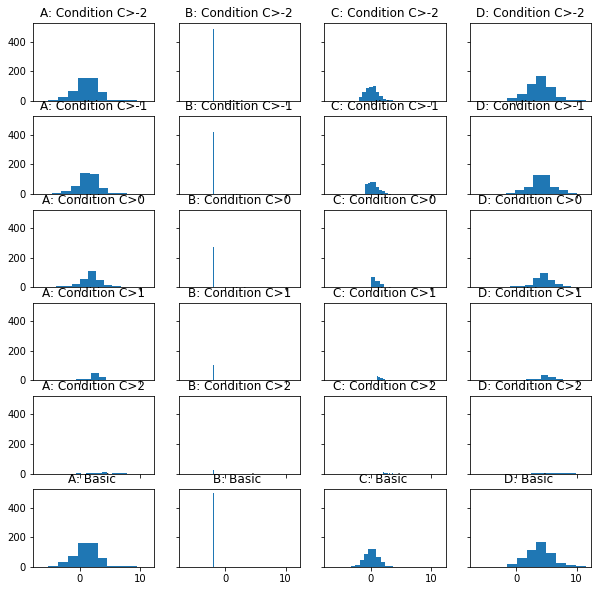

In [ ]:
condition(data_intervene_Bminus2_matrix, 2)

[[ 1.18247525 -2.          0.11853697  3.8457817 ]
 [ 1.20201265 -2.          0.12705485  3.86598026]
 [ 1.31871382 -2.          0.13500222  3.99371382]
 [ 1.54909434 -2.          0.21624002  4.23213005]
 [ 1.78908629 -2.          0.30942971  4.52241963]
 [ 1.12827368 -2.          0.10870097  3.78827368]]
[[3.89960106 0.         1.23843597 4.30999698]
 [3.81994603 0.         1.21895605 4.22625157]
 [3.44564676 0.         1.22192118 3.77105297]
 [2.85525656 0.         1.13124487 3.18110832]
 [2.52959504 0.         1.06714442 2.6321896 ]
 [4.23952064 0.         1.24159853 4.69160827]]


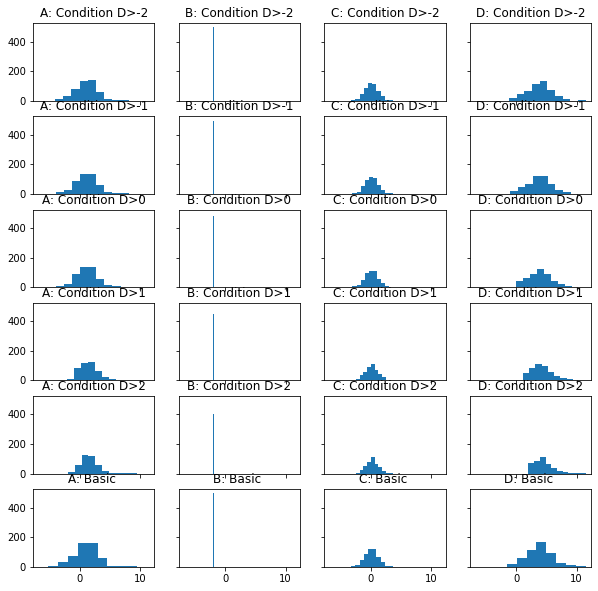

In [ ]:
condition(data_intervene_Bminus2_matrix, 3)

Intervention: A=-2


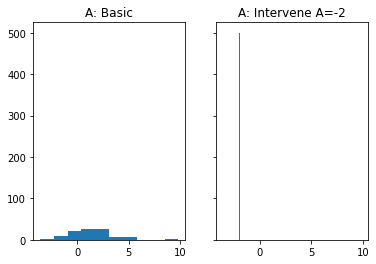

Basic Mean: 1.30157291758728
Intervene A=-2 Mean: -2.0
Basic Var: 4.3694651104384095
Intervene A=-2 Var: 0.0


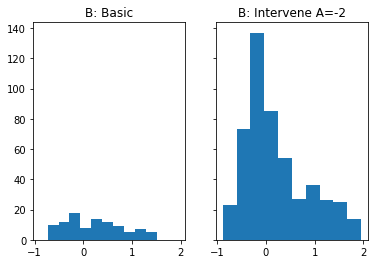

Basic Mean: 0.22970429348094684
Intervene A=-2 Mean: 0.20703020612867598
Basic Var: 0.3534192188391627
Intervene A=-2 Var: 0.4092507577700371


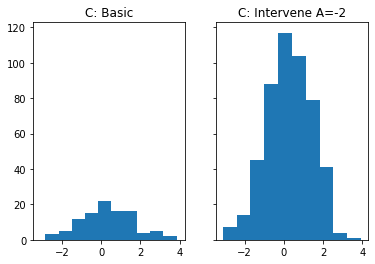

Basic Mean: 0.3045597398188776
Intervene A=-2 Mean: 0.27865341037198593
Basic Var: 1.767712459120838
Intervene A=-2 Var: 1.2834626876323592


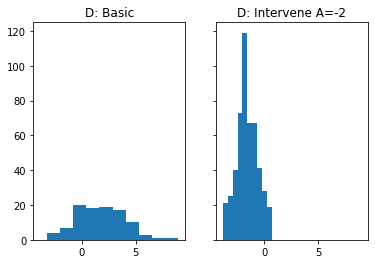

Basic Mean: 1.771868624106333
Intervene A=-2 Mean: -1.577030206128676
Basic Var: 4.833722824841079
Intervene A=-2 Var: 0.9419235586817305


In [ ]:
data_intervene_Aminus2 = pd.read_csv("Data_Intervene_Aminus2.csv")
data_intervene_Aminus2_matrix = data_intervene_Aminus2[attributeNames].to_numpy()
compare(data_matrix, data_intervene_Aminus2_matrix, "Basic","Intervene A=-2")

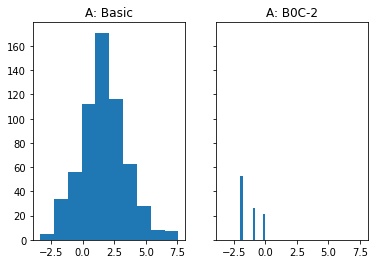

Basic Mean: 1.6409057914083156
B0C-2 Mean: -1.32
Basic Var: 3.221603293105706
B0C-2 Var: 0.6376000000000002


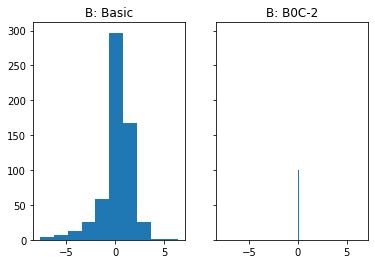

Basic Mean: 0.21229411061003423
B0C-2 Mean: 0.0
Basic Var: 2.4118343132357913
B0C-2 Var: 0.0


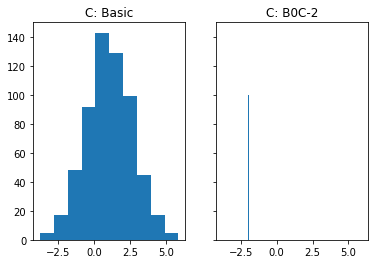

Basic Mean: 1.051012539037852
B0C-2 Mean: -2.0
Basic Var: 2.5620911821691794
B0C-2 Var: 0.0


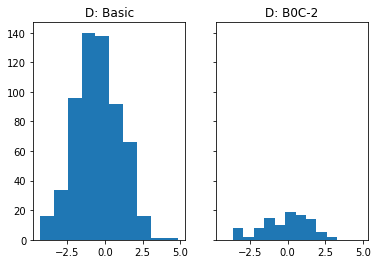

Basic Mean: -0.5178748515200666
B0C-2 Mean: -0.14125283662338828
Basic Var: 2.138740425921494
B0C-2 Var: 2.344610082339715


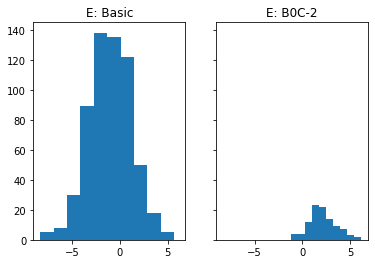

Basic Mean: -1.0425902736282966
B0C-2 Mean: 2.0896543316283362
Basic Var: 4.900543947594995
B0C-2 Var: 1.9174188494948323


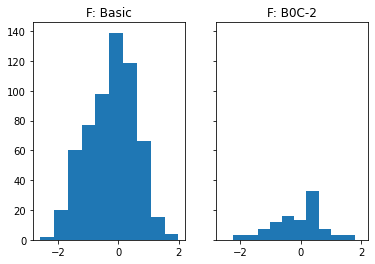

Basic Mean: -0.2269426289645107
B0C-2 Mean: -0.10272579422484605
Basic Var: 0.6149271811079514
B0C-2 Var: 0.6448916262446766


In [20]:
data_b0c2 = pd.read_csv("data_B0Cminus2.csv")
data_b0c2_matrix = data_b0c2[attributeNames].to_numpy()
compare(data_matrix, data_b0c2_matrix, "Basic","B0C-2")

In [26]:
print(data_b0c2_matrix[:,0])

[-2.  0. -1. -2. -2.  0. -1. -2. -1.  0. -2. -1. -1. -2.  0. -2.  0. -2.
 -2. -1. -2.  0. -1. -1. -2. -2. -1. -2. -1.  0. -1. -2. -2. -1. -1. -1.
  0. -1.  0. -2. -2. -2. -1. -2.  0. -2. -2. -1. -2. -1. -1.  0.  0. -1.
 -2. -2. -2. -1. -2. -2. -2.  0. -2. -2. -2. -2. -2. -1.  0. -2. -1.  0.
 -2. -2. -2.  0. -1. -2.  0. -2. -2. -2. -2. -2. -2. -2. -2. -1.  0.  0.
 -2. -2. -1. -2. -2.  0. -2.  0. -2. -2.]


[[ 0.          0.         -2.         -0.40113995  2.1829433  -0.34541747]
 [-1.          0.         -2.          0.13417921  1.97472867  0.08483884]
 [-2.          0.         -2.         -0.1733963   2.10906941 -0.09857778]]
[[0.         0.         0.         3.79389389 2.67305006 1.02496482]
 [0.         0.         0.         1.99075102 1.32743087 0.69705582]
 [0.         0.         0.         1.87894622 1.89714128 0.42809361]]


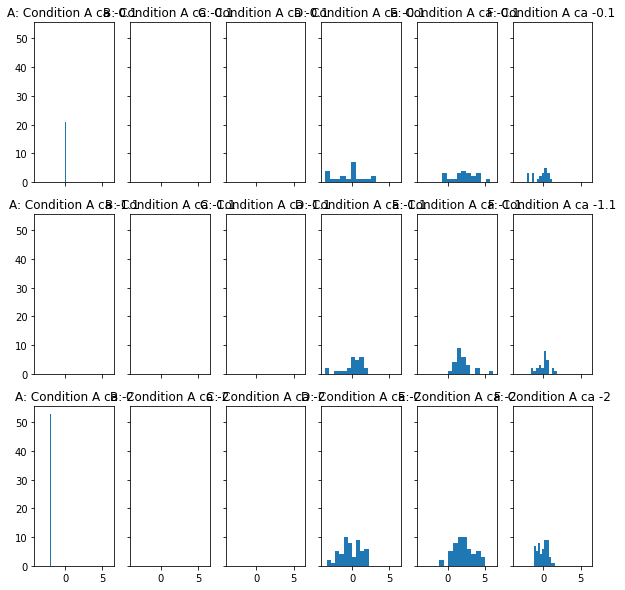

In [28]:
#condition2(data_b0c2_matrix, 0)
data = data_b0c2_matrix
attributeNames = ["A","B","C","D","E","F"]
fig, ax = plt.subplots(nrows = 3, ncols=6, sharex=True, sharey=True, figsize = (10,10))
info_mean = np.zeros((3,6))
info_var = np.zeros((3,6))
data_cond1 = data[data[:,0]==0]
data_cond2 = data[data[:,0]==-1]
data_cond3 = data[data[:,0]==-2]
for j in range(0,6):
    ax[0,j].hist(data_cond1[:,j])
    ax[0,j].title.set_text(attributeNames[j] + ": Condition " + attributeNames[0] + " ca -0.1 ")
    info_mean[0,j] = np.mean(data_cond1[:,j])
    info_var[0,j] = np.var(data_cond1[:,j])
for j in range(0,6):
    ax[1,j].hist(data_cond2[:,j])
    ax[1,j].title.set_text(attributeNames[j] + ": Condition " + attributeNames[0] + " ca -1.1")
    info_mean[1,j] = np.mean(data_cond2[:,j])
    info_var[1,j] = np.var(data_cond2[:,j])
for j in range(0,6):
    ax[2,j].hist(data_cond3[:,j])
    ax[2,j].title.set_text(attributeNames[j] + ": Condition " + attributeNames[0] + " ca -2")
    info_mean[2,j] = np.mean(data_cond3[:,j])
    info_var[2,j] = np.var(data_cond3[:,j])
print(info_mean)
print(info_var)
plt.show()


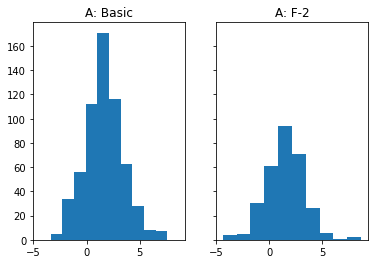

Basic Mean: 1.6409057914083156
F-2 Mean: 1.5148113463697097
Basic Var: 3.221603293105706
F-2 Var: 3.1470070832919244


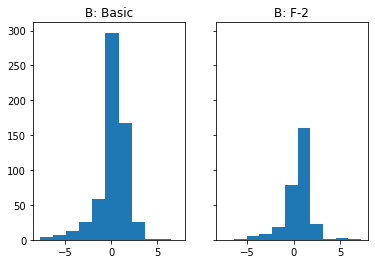

Basic Mean: 0.21229411061003423
F-2 Mean: 0.45001075129666673
Basic Var: 2.4118343132357913
F-2 Var: 2.0652009177012043


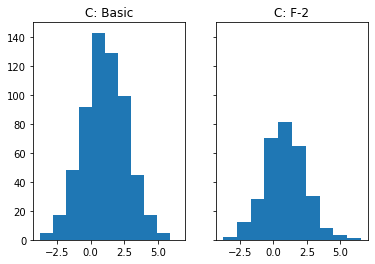

Basic Mean: 1.051012539037852
F-2 Mean: 0.8777099226939193
Basic Var: 2.5620911821691794
F-2 Var: 2.290389408309562


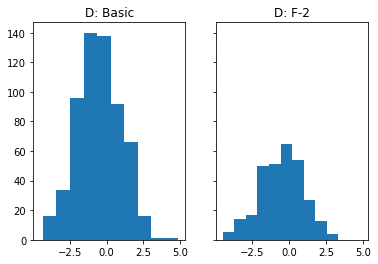

Basic Mean: -0.5178748515200666
F-2 Mean: -0.5030077834039772
Basic Var: 2.138740425921494
F-2 Var: 2.182493581956105


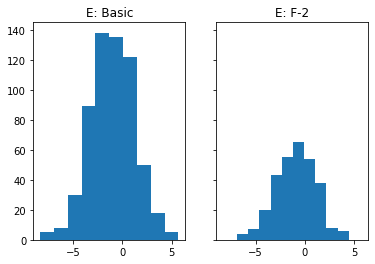

Basic Mean: -1.0425902736282966
F-2 Mean: -0.9399261491735895
Basic Var: 4.900543947594995
F-2 Var: 3.942772280633274


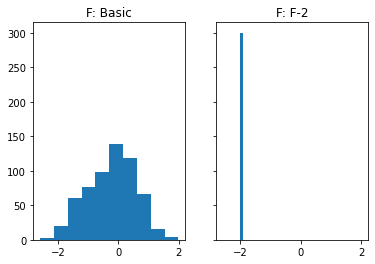

Basic Mean: -0.2269426289645107
F-2 Mean: -2.0
Basic Var: 0.6149271811079514
F-2 Var: 0.0


In [ ]:
data_fminus2 = pd.read_csv("data_Fminus2.csv")
data_fminus2_matrix = data_fminus2[attributeNames].to_numpy()
compare(data_matrix, data_fminus2_matrix, "Basic","F-2")

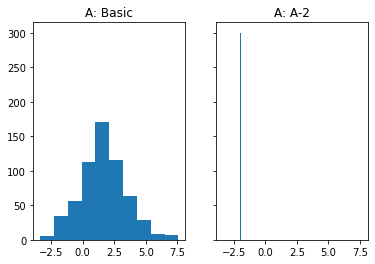

Basic Mean: 1.6409057914083156
A-2 Mean: -2.0
Basic Var: 3.221603293105706
A-2 Var: 0.0


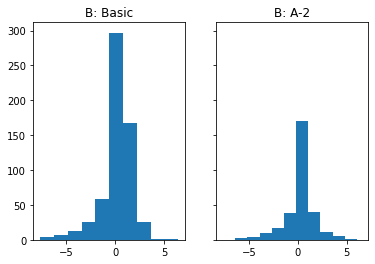

Basic Mean: 0.21229411061003423
A-2 Mean: 0.2680528224714314
Basic Var: 2.4118343132357913
A-2 Var: 2.2437677773323177


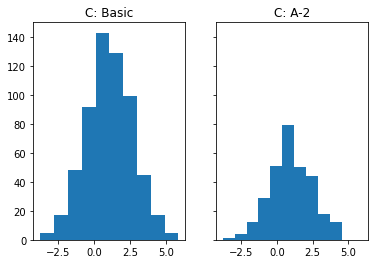

Basic Mean: 1.051012539037852
A-2 Mean: 0.9973422349268177
Basic Var: 2.5620911821691794
A-2 Var: 2.1044331878897147


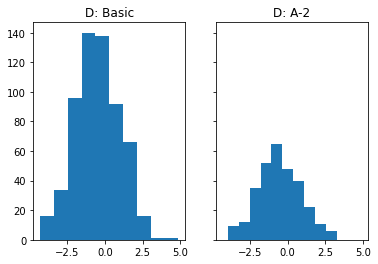

Basic Mean: -0.5178748515200666
A-2 Mean: -0.5351165902227677
Basic Var: 2.138740425921494
A-2 Var: 2.015489801659269


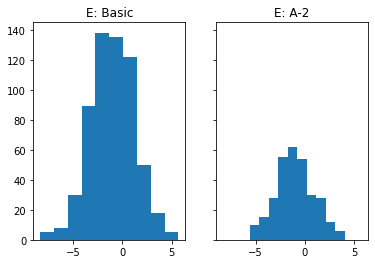

Basic Mean: -1.0425902736282966
A-2 Mean: -1.0012676227361181
Basic Var: 4.900543947594995
A-2 Var: 3.6951381463946005


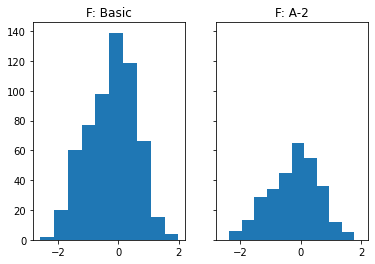

Basic Mean: -0.2269426289645107
A-2 Mean: -0.23929978270824773
Basic Var: 0.6149271811079514
A-2 Var: 0.6622419148416435


In [33]:
data_aminus2 = pd.read_csv("data_Aminus2.csv")
data_aminus2_matrix = data_aminus2[attributeNames].to_numpy()
compare(data_matrix, data_aminus2_matrix, "Basic","A-2")

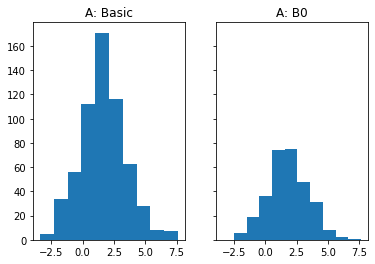

Basic Mean: 1.6409057914083156
B0 Mean: 1.8082501796320904
Basic Var: 3.221603293105706
B0 Var: 2.5872990050722637


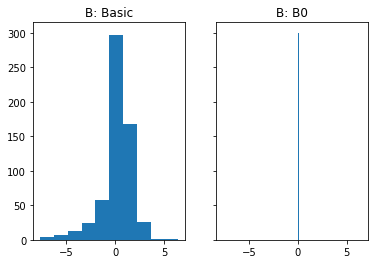

Basic Mean: 0.21229411061003423
B0 Mean: 0.0
Basic Var: 2.4118343132357913
B0 Var: 0.0


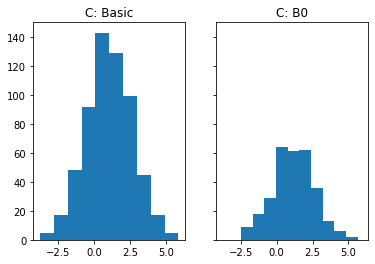

Basic Mean: 1.051012539037852
B0 Mean: 1.1515835129654237
Basic Var: 2.5620911821691794
B0 Var: 2.04820869350737


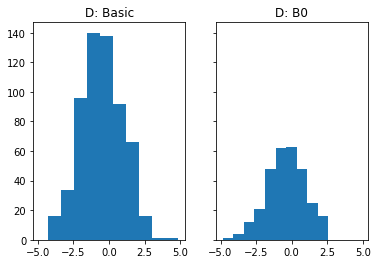

Basic Mean: -0.5178748515200666
B0 Mean: -0.3925221668955399
Basic Var: 2.138740425921494
B0 Var: 1.811061197507909


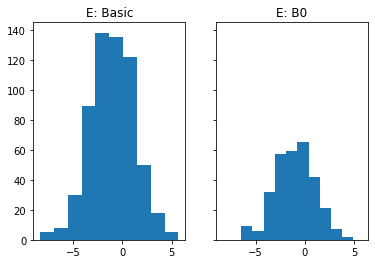

Basic Mean: -1.0425902736282966
B0 Mean: -1.0511057354631879
Basic Var: 4.900543947594995
B0 Var: 3.997953058985028


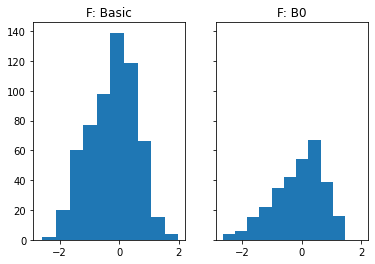

Basic Mean: -0.2269426289645107
B0 Mean: -0.10395610287519164
Basic Var: 0.6149271811079514
B0 Var: 0.6828383151523437


In [36]:
data_b0 = pd.read_csv("data_B0.csv")
data_b0_matrix = data_b0[attributeNames].to_numpy()
compare(data_matrix, data_b0_matrix, "Basic","B0")